In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from osgeo import gdal
import xarray as xr
from scipy.io import loadmat
import matplotlib.dates as mdates

In [2]:
def xyz_geotiff(img):
    band = img.GetRasterBand(1)
    z = np.flipud(band.ReadAsArray())
    width = img.RasterXSize
    height = img.RasterYSize
    gt = img.GetGeoTransform()
    minx = gt[0]
    miny = gt[3] + width*gt[4] + height*gt[5]
    maxx = gt[0] + width*gt[1] + height*gt[2]
    maxy = gt[3]
    lon = np.linspace(minx,maxx,width)
    lat = np.linspace(miny,maxy,height)
    return lon,lat,z

# Reading data

In [3]:
DEM = gdal.Open('Data/2019_bathy_picnic_extent.tif')
lon,lat,z = xyz_geotiff(DEM)
z[z<0] = np.nan

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [9]:
data = pd.read_csv('Data/409202a_historical_Tocumwal_gauge.csv')
data.keys()
date = pd.to_datetime(data['Date'], format='%d/%m/%Y')
discharge= data['Discharge (ML/Day)']
ID_datestart = date[date == '2021-01-01'].index[0] 
discharge = pd.to_numeric(discharge, errors='coerce')

# Plots

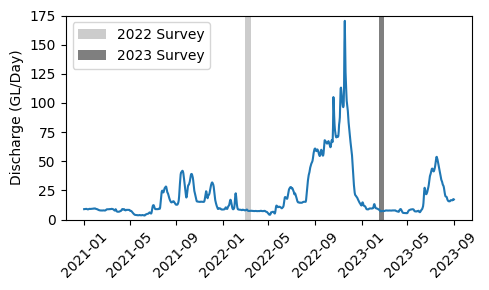

In [10]:
draft = True
plt.figure(figsize=(5, 3))
plt.plot(date[ID_datestart:-1], discharge[ID_datestart:-1], linestyle='-')
survey22 = plt.fill_betweenx([0,175000],pd.to_datetime('2022-03-01'),pd.to_datetime('2022-03-15'),color='black',lw=0,alpha=0.2,label='2022 Survey')
survey23 = plt.fill_betweenx([0,175000],pd.to_datetime('2023-02-15'),pd.to_datetime('2023-02-28'),color='black',lw=0,alpha=0.5,label='2023 Survey')
plt.legend(handles =[survey22, survey23],loc='upper left')
plt.ylim(0,175000)
ML2GL = lambda x, _: f'{x/1000:g}'
plt.gca().yaxis.set_major_formatter(ML2GL)
plt.ylabel('Discharge (GL/Day)')
plt.xticks(rotation=45)  
plt.tight_layout()

# saving figure
if draft==False:
    plt.savefig('discharge_python',dpi=300)

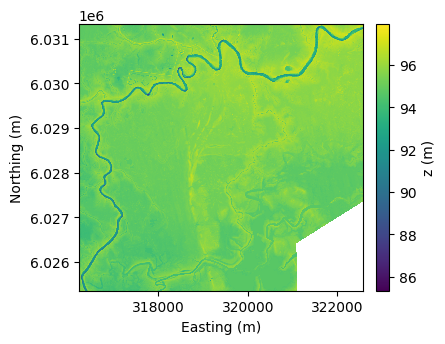

In [11]:
draft = True

plt.figure(figsize=(4,4))
plt.pcolormesh(lon,lat,z)
plt.axis('square')
plt.colorbar(fraction=0.043, pad=0.04, label='z (m)')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.ylim(np.min(lat), np.max(lat)) 

# saving figure
if draft==False:
    plt.savefig('barmah_DEM',dpi=300,bbox_inches='tight')